In [1]:
import pandas as pd
food_order=pd.read_csv('/Users/surya/Downloads/food_orders_new_delhi.csv')

In [2]:
food_order.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [3]:
food_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [4]:
#Data Preparation
from datetime import datetime

#Convert data and time columns to datetime column
food_order['Order Date and Time']=pd.to_datetime(food_order['Order Date and Time'])
food_order['Delivery Date and Time']=pd.to_datetime(food_order['Delivery Date and Time'])


#Create a function to extract numeric values from Discount and offer strings
def extract_discount(discount_str):
    if 'off' in discount_str:
        #fixed off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        #percentage off
        return float(discount_str.split('%')[0])
    else:
        return 0

#Apply the function to create a new 'Discount Value' column
food_order['Discount_percent']=food_order['Discounts and Offers'].apply(lambda x: extract_discount(x))
food_order['Discount_Amt']=food_order.apply(lambda x: (x['Order Value'] * x['Discount_percent'] / 100)
                                                   if x['Discount_percent'] > 1
                                                   else x['Discount_percent'], axis=1)

# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
food_order['Discount_Amt'] = food_order.apply(lambda x: x['Discount_Amt'] if x['Discount_percent'] <= 1
                                                   else x['Order Value'] * x['Discount_percent'] / 100, axis=1)





In [5]:
print(food_order[['Order Value', 'Discounts and Offers', 'Discount_percent', 'Discount_Amt']].head(), food_order.dtypes)

   Order Value Discounts and Offers  Discount_percent  Discount_Amt
0         1914            5% on App               5.0         95.70
1          986                  10%              10.0         98.60
2          937         15% New User              15.0        140.55
3         1463                 None               0.0          0.00
4         1992         50 off Promo              50.0        996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount_percent                 float64
Discount_Amt                     float64
dtype: object


# Cost and Profitability Analysis

In [6]:
#Calculate Totalcost and Revenue per order
food_order['Total cost']=food_order['Delivery Fee']+food_order['Payment Processing Fee']+food_order['Discount_Amt']
food_order['Revenue']=food_order['Commission Fee']
food_order['Profit'] = food_order['Revenue']- food_order['Total cost']

#Aggregating data
total_orders = food_order.shape[0]
total_revenue = food_order['Revenue'].sum()
total_costs = food_order['Total cost'].sum()
total_profit = food_order['Profit'].sum()

#Overall Metrics
overall_metrics= {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}


## Visualization

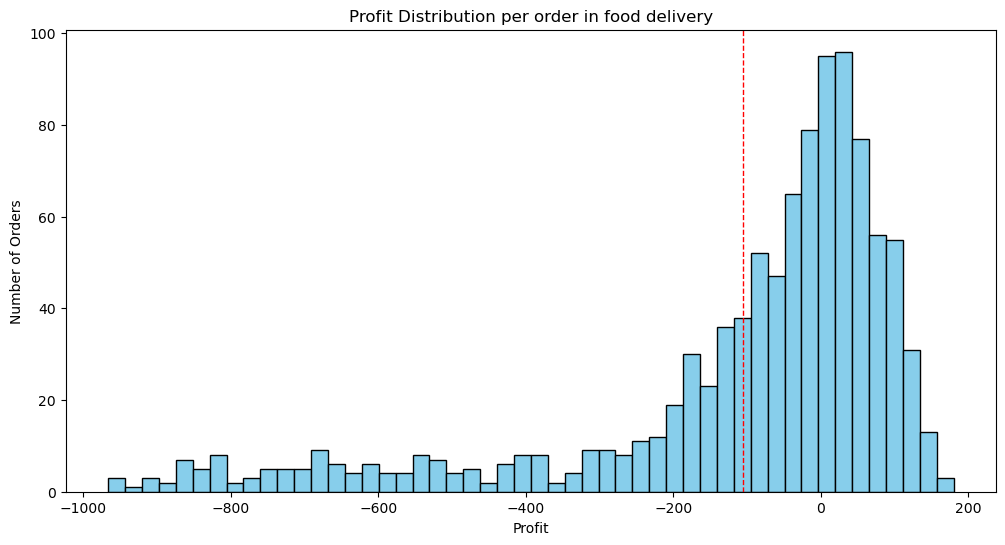

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.hist(food_order['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per order in food delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_order['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

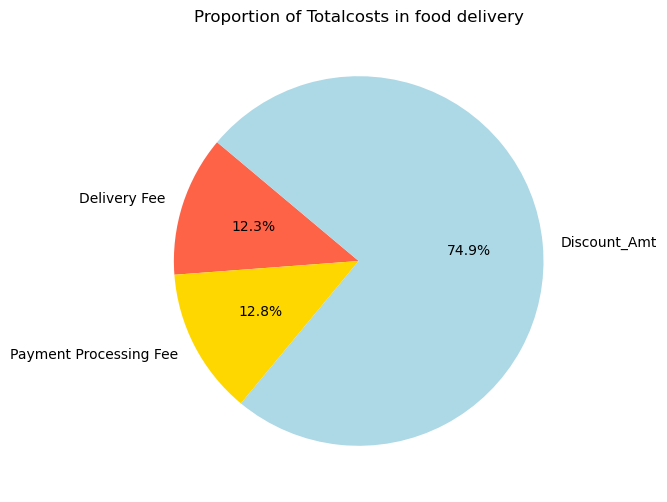

In [9]:
#Pie Chart for the proportion of total costs
cost_breakdown = food_order[['Delivery Fee','Payment Processing Fee','Discount_Amt']].sum()
plt.figure(figsize=(6,6))
plt.pie(cost_breakdown, labels =cost_breakdown.index,autopct='%1.1f%%',startangle = 140,colors = ['tomato', 'gold', 'lightblue']) 
plt.title('Proportion of Totalcosts in food delivery') 
plt.show()


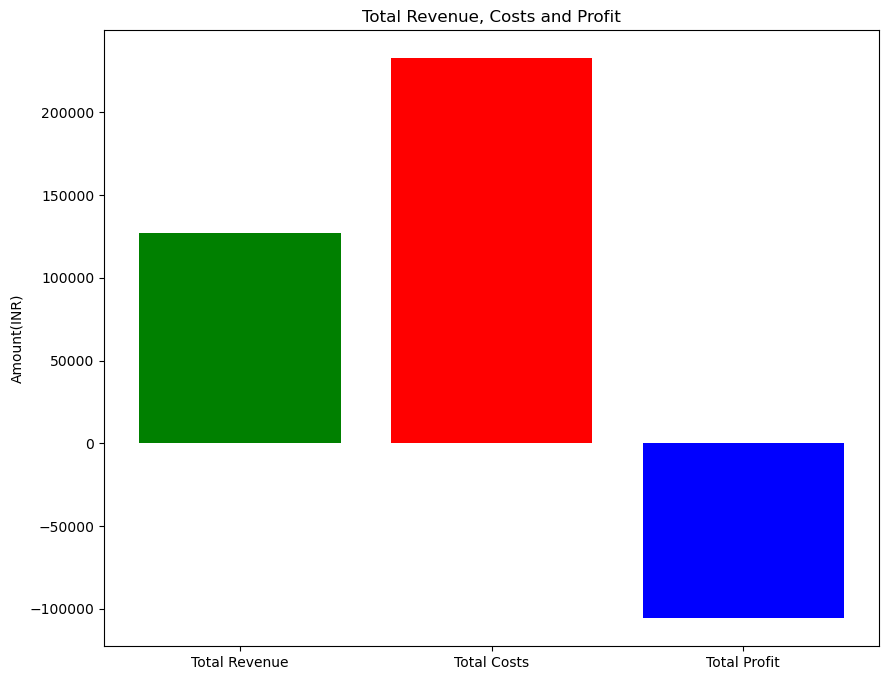

In [15]:
#Barchart for total revenue, costs,profits
totals=['Total Revenue', 'Total Costs','Total Profit']
values=[total_revenue,total_costs,total_profit]

plt.figure(figsize=(10,8))
plt.bar(totals, values, color=['green','red','blue'])
plt.title('Total Revenue, Costs and Profit')
plt.ylabel('Amount(INR)')
plt.show()

## New Strategy for Profit

In [20]:
#Filter the dataset for profitable orders
profitable_order=food_order[food_order['Profit']>0]

#Calculate average commission percentage
profitable_order['Commission Percentage']=profitable_order['Commission Fee']/profitable_order['Order Value']*100

#Calculate average discount percentage
profitable_order['Effective Discount Percentage']=profitable_order['Discount_Amt']/profitable_order['Order Value']*100

#Calculate New Averages
new_avg_commission_percentage = profitable_order['Commission Percentage'].mean()
new_avg_effective_discount_percentage = profitable_order['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage,new_avg_effective_discount_percentage)

30.508436145149435 5.867469879518072


/var/folders/z8/bn08xxkn59vf8m8163fd09pw0000gn/T/ipykernel_1040/1712793427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_order['Commission Percentage']=profitable_order['Commission Fee']/profitable_order['Order Value']*100
/var/folders/z8/bn08xxkn59vf8m8163fd09pw0000gn/T/ipykernel_1040/1712793427.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_order['Effective Discount Percentage']=profitable_order['Discount_Amt']/profitable_order['Order Value']*100


In [19]:
profitable_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 997
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                415 non-null    int64         
 1   Customer ID             415 non-null    object        
 2   Restaurant ID           415 non-null    object        
 3   Order Date and Time     415 non-null    datetime64[ns]
 4   Delivery Date and Time  415 non-null    datetime64[ns]
 5   Order Value             415 non-null    int64         
 6   Delivery Fee            415 non-null    int64         
 7   Payment Method          415 non-null    object        
 8   Discounts and Offers    415 non-null    object        
 9   Commission Fee          415 non-null    int64         
 10  Payment Processing Fee  415 non-null    int64         
 11  Refunds/Chargebacks     415 non-null    int64         
 12  Discount_percent        415 non-null    float64   

In [26]:
#Simulated profitability with recommended commission and discount
recommended_commission_percentage= 30.0
recommended_discount_percentage= 6.0

#Calculate simulated commission fee and Discount amt
food_order['Simulated commission fee']=food_order['Order Value']*recommended_commission_percentage/100
food_order['Simulated Discount Amt']=food_order['Order Value']*recommended_discount_percentage/100

#Recalculate the Total costs,profit with simulated values
food_order['Simulated Total cost']=(food_order['Delivery Fee'] +
                                    food_order['Payment Processing Fee'] +
                                    food_order['Simulated Discount Amt'] )
food_order['Simulated Profit'] =(food_order['Simulated commission fee']-food_order['Simulated Total cost'])

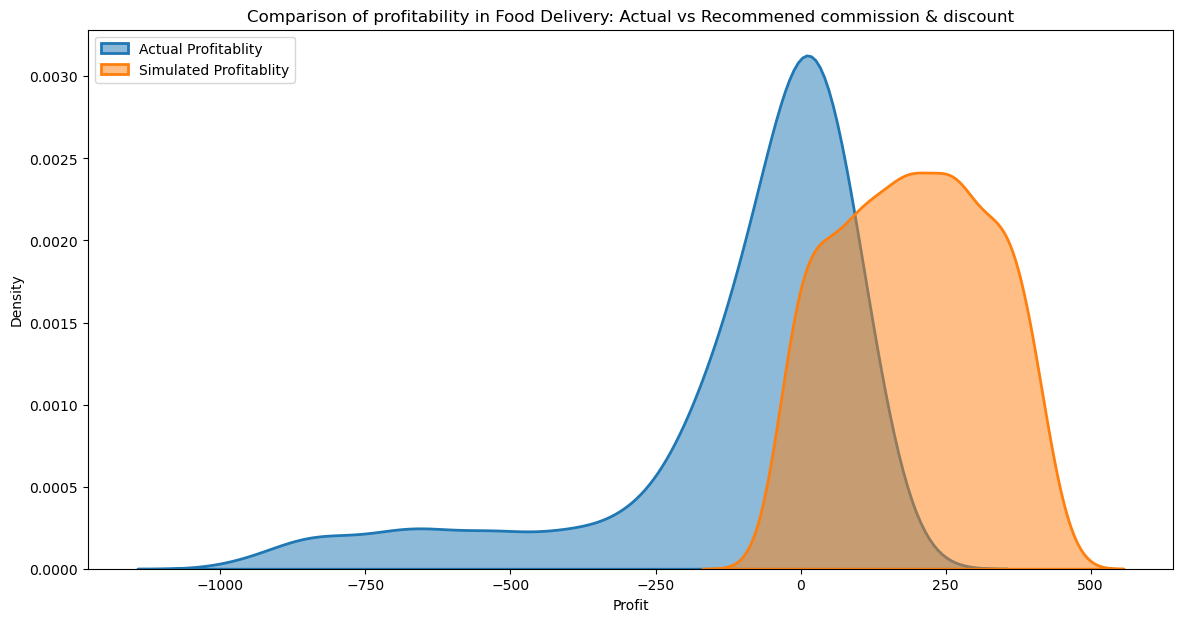

In [27]:
#Visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14,7))

#Actual Profitability
sns.kdeplot(food_order['Profit'],label='Actual Profitablity',fill=True, alpha=0.5, linewidth=2)

#Simulated Profitability
sns.kdeplot(food_order['Simulated Profit'],label='Simulated Profitablity',fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of profitability in Food Delivery: Actual vs Recommened commission & discount')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()